In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
train_df = pd.read_csv("data/train.csv")

# Data exploration and preprocessnig

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Define two functions for later use.


In [4]:
def euklidian_dist(a_x,a_y,b_x,b_y):
    return np.sqrt((a_x - b_x)**2 + (a_y - b_y)**2)

def manhattan_dist(a_x,a_y,b_x,b_y):
    return np.absolute(a_x - b_x) + np.absolute(a_y - b_y)

Here we define our custom fields:
    1. Transform field pickup_datetime to extract information about: month, day of the month, day of the week 
        and hour.
        
    2. Euklidian distance between pickup place and dropoff place.
    
    3. Mahattan distance between pickup place and dropoff place, because we operate in NYC.
    
    4. We also transform trip_duration field with log function.

In [5]:
train_df['datetime'] = pd.to_datetime(train_df.pickup_datetime)
train_df['day_of_week'] = train_df.datetime.dt.dayofweek
train_df['hour'] = train_df.datetime.dt.hour
train_df['day_of_month'] = train_df.datetime.dt.day
train_df['month'] = train_df.datetime.dt.month
train_df['euklidian_distance'] = euklidian_dist(train_df.dropoff_latitude,  train_df.dropoff_longitude, train_df.pickup_latitude,train_df.pickup_longitude)
train_df['manhattan_distance'] = manhattan_dist(train_df.dropoff_latitude,  train_df.dropoff_longitude, train_df.pickup_latitude,train_df.pickup_longitude)
train_df['log_trip_duration'] = np.log(train_df.trip_duration)

In [6]:
#actual data frame
train_df[:11]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,datetime,day_of_week,hour,day_of_month,month,euklidian_distance,manhattan_distance,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14 17:24:55,0,17,14,3,0.017680,0.019859,6.120297
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12 00:43:35,6,0,12,6,0.020456,0.026478,6.496775
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19 11:35:24,1,11,19,1,0.059934,0.080158,7.661056
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06 19:32:31,2,19,6,4,0.013438,0.015480,6.061457
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26 13:30:55,5,13,26,3,0.010690,0.010818,6.075346
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,2016-01-30 22:01:40,5,22,30,1,0.011572,0.016212,6.093570
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,2016-06-17 22:34:59,4,22,17,6,0.014133,0.019669,5.831882
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,2016-05-21 07:54:58,5,7,21,5,0.059801,0.084026,7.346655
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,2016-05-27 23:12:23,4,23,27,5,0.014790,0.019279,5.541264
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,2016-03-10 21:45:01,3,21,10,3,0.046355,0.053699,7.110696


We tranform use log function on trip_duration, because it is supposed reduce skeewnes.

More on that here
https://becominghuman.ai/how-to-deal-with-skewed-dataset-in-machine-learning-afd2928011cc

All I know is that can help with regression in some cases, and it was true in ours.

Here is what is correlation between given fields and a trip_duration, it gives us information how each field influences the output:


In [7]:
corr = train_df.corr()
print(corr["trip_duration"].sort_values(ascending = False))

trip_duration         1.000000
log_trip_duration     0.252624
euklidian_distance    0.095368
manhattan_distance    0.094738
pickup_longitude      0.026542
vendor_id             0.020304
dropoff_longitude     0.014678
passenger_count       0.008471
month                 0.006607
hour                  0.003690
day_of_month          0.000566
day_of_week          -0.000708
dropoff_latitude     -0.020677
pickup_latitude      -0.029204
Name: trip_duration, dtype: float64


And here is correlation betwen given fields and log_trip_duration:


In [8]:
print(corr["log_trip_duration"].sort_values(ascending = False))

log_trip_duration     1.000000
euklidian_distance    0.567401
manhattan_distance    0.561209
trip_duration         0.252624
pickup_longitude      0.110344
dropoff_longitude     0.071411
month                 0.046488
hour                  0.039107
passenger_count       0.021124
vendor_id             0.019833
day_of_month          0.010385
day_of_week          -0.027817
dropoff_latitude     -0.123265
pickup_latitude      -0.144149
Name: log_trip_duration, dtype: float64


In [9]:
#column names
train_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'datetime', 'day_of_week', 'hour', 'day_of_month',
       'month', 'euklidian_distance', 'manhattan_distance',
       'log_trip_duration'],
      dtype='object')

In [10]:
train_X = train_df[[
       'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude',
       'hour', 'month', 
       'euklidian_distance', 'manhattan_distance',
       ]].values


train_y = train_df['log_trip_duration'].values

array([ -7.39804153e+01,   4.07385635e+01,  -7.39994812e+01,
         4.07311516e+01,   0.00000000e+00,   6.00000000e+00,
         2.04559039e-02,   2.64778137e-02])

In [11]:
train_X

array([[ -7.39821548e+01,   4.07679367e+01,  -7.39646301e+01, ...,
          3.00000000e+00,   1.76795395e-02,   1.98593140e-02],
       [ -7.39804153e+01,   4.07385635e+01,  -7.39994812e+01, ...,
          6.00000000e+00,   2.04559039e-02,   2.64778137e-02],
       [ -7.39790268e+01,   4.07639389e+01,  -7.40053329e+01, ...,
          1.00000000e+00,   5.99337994e-02,   8.01582336e-02],
       ..., 
       [ -7.39591293e+01,   4.07687988e+01,  -7.40044327e+01, ...,
          4.00000000e+00,   7.63269339e-02,   1.06731415e-01],
       [ -7.39820786e+01,   4.07490616e+01,  -7.39746323e+01, ...,
          1.00000000e+00,   1.09623176e-02,   1.54914856e-02],
       [ -7.39795380e+01,   4.07817497e+01,  -7.39728088e+01, ...,
          4.00000000e+00,   1.11056524e-02,   1.55639648e-02]])

We scale our input. By calculating mean of each column, and then dividing each element by mean of column it is in. After that operation all input fields should be moreover the same.

In [12]:
means = np.array([np.mean(train_X[:,i]) for i in range(len(train_X[0]))])
train_X = train_X / means

In [13]:
train_X[1]

array([ 1.00009367,  0.99969676,  1.00035236,  0.99949332,  0.        ,
        1.70608788,  0.57650972,  0.57684401])

We now can check correlation betwen input fields. We visualize that with matrix.

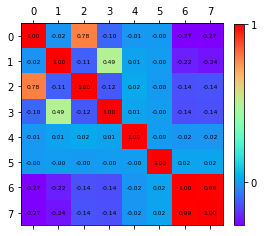

In [13]:
import matplotlib.pyplot as plt
cov_data = np.corrcoef(train_X.T)
img = plt.matshow(cov_data, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks=[-1, 0, 1],fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x,y, "%0.2f" % cov_data[x,y], 
             size=6, color='black', ha="center", va="center")
plt.show()

We do not see very strong correlation betwen features apart from **euklidian_distance** and **manhattan_distance** which is not that big of surprise. However have decided to use both euklidian and manhattan distance, because this configuration gave us the best results

We select 8 features for model training:

1. euklidian_distance (calculated from coordinates)
2. manhattan_distance (calculated from coordinates)
3. pickup_latitude
4. pickup_longitude
5. dropoff_latitude
6. dropoff_longitude
7. month
8. hour

# Model testing

To test performance of models we use cross validation. Given data is randomly splited, with first part of dataset model is trained, and other part is used for testing. This process is repeated two times.


We use **NEGATIVE MEAN SQUARED ERROR** as a scoring function.

After that we calculate mean and standard error of all tests.

**1. Support vector machine with liear kernel**

In [22]:
from sklearn.svm import SVR

model = SVR(kernel='linear',C=1)
score = cross_val_score(model, train_X[:100000], train_y[:100000], scoring='neg_mean_squared_error', cv=2)
print("average: {} std: {}".format(score.mean(), score.std()*2))

average: -0.4029606009563827 std: 0.0035690115845566917


**2. Svm with radian based function kernel**

In [31]:
from sklearn.svm import SVR
model =  SVR(kernel='rbf', C=1)
score = cross_val_score(model, train_X[:100000], train_y[:100000], scoring='neg_mean_absolute_error', cv=2)
print("average: {} std: {}".format(score.mean(), score.std()*2))



average: -0.5718316168537649 std: 0.009856788742861333


**3. Extra Trees regressor**


In [51]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators=30, criterion='mse',n_jobs=-1)
score = cross_val_score(model, train_X[:100000], train_y[:100000], scoring='neg_mean_squared_error', cv=2)
print("average: {} std: {}".format(score.mean(), score.std()*2))

average: -0.2112642692752844 std: 0.001417616736263505


**4 .Gradient Boosted Trees**

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(criterion='mae')
score = cross_val_score(model, train_X[:100000], train_y[:100000], scoring='neg_mean_squared_error', cv=2)
print("average: {} std: {}".format(score.mean(), score.std()*2))

average: -0.20860082611219993 std: 0.005568361927162313


**5. NN**

In [54]:
#Input data dimention
len(train_X[0])

12

We created three diferent neural network models for testing.

In [0]:
from keras.layers import Dense
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor


#One deep layer with twelve units

def baseline_model():
  model = Sequential()
  model.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error', optimizer='adam')
  return model




def deep_model():
  model = Sequential()
  model.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
  model.add(Dense(6, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error', optimizer='adam')
  return model




def wide_model():
  model = Sequential()
  model.add(Dense(20 ,input_dim=12,kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error', optimizer='adam')
  return model





def super_model():
  model = Sequential()
  model.add(Dense(20 ,input_dim=12,kernel_initializer='normal', activation='linear'))
  model.add(Dense(30 ,input_dim=12,kernel_initializer='normal', activation='linear'))
  model.add(Dense(20 ,input_dim=12,kernel_initializer='normal', activation='linear'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error', optimizer='adam')
  return model



**baseline model** is neural network with one deep layer containing 12 units.

In [49]:
#baseline model
model = KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=5, verbose=0)

score = cross_val_score(model, train_X[:100000], train_y[:100000], scoring='neg_mean_squared_error', cv=2)
print("average: {} std: {}".format(score.mean(), score.std()*2))

average: -0.41262410003476846 std: 0.005083226723735235


**deep model** is neural network with two deep layers, first with twelve units and second with six

In [50]:
#deep model
model = KerasRegressor(build_fn=deep_model, epochs=10, batch_size=5, verbose=0)

score = cross_val_score(model, train_X[:100000], train_y[:100000], scoring='neg_mean_squared_error', cv=2)
print("average: {} std: {}".format(score.mean(), score.std()*2))

average: -0.4086664039889718 std: 0.0022726769349029063


**wide model** is neural network with one deep layer containing 20 cells

In [52]:
#wide model
model = KerasRegressor(build_fn=wide_model, epochs=10, batch_size=5, verbose=0)

score = cross_val_score(model, train_X[:100000], train_y[:100000], scoring='neg_mean_squared_error', cv=2)
print("average: {} std: {}".format(score.mean(), score.std()*2))

average: -0.4288367635620518 std: 0.008279389463369868


**super model** is putting the saying "The more the better" to test. It is neural network with three deep layers:
*  First with 20 units
*  Second with 30 units
*  Third with 20 units





In [72]:
#super model
model = KerasRegressor(build_fn=super_model, epochs=5, batch_size=5, verbose=0)

score = cross_val_score(model, train_X[:100000], train_y[:100000], scoring='neg_mean_squared_error', cv=2)
print("average: {} std: {}".format(score.mean(), score.std()*2))

average: -0.43262690728540126 std: 0.024165916882937455


All networks has average mse around 0.4 which translates into 1.49 seconds of error.

# Summary

After testing 8 different models we get following results.

Model ranked by performance in cross validation scored by mean mean squarred error:


1 . Gradient Boosted Trees **0.208**


2 . Random Trees Regressor **0.211**


3 . Support Vector Machine with linear kernel **0.402**


4 . The "deep model" Neural Network **0.408**


5 . The "baseline model" Neural Network **0.412**


6 . The "wide model" Neural Network **0.428**


7 . The "super model" Neural Network **0.432**


8 . Support Vector Machine with rbf kernel **0.571**



For further development we choose **Gradient Boosted Trees** model, which scored the lowest error of all model. The Downside is relatively long time of training which can be a bit painfull with using the whole database containing over 1 milion records.

A: danpisq @ UNTER